In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./swedish_insurance.csv')

In [3]:
df.head()

X      Y
0  108  392.5
1   19   46.2
2   13   15.7
3  124  422.2
4   40  119.4

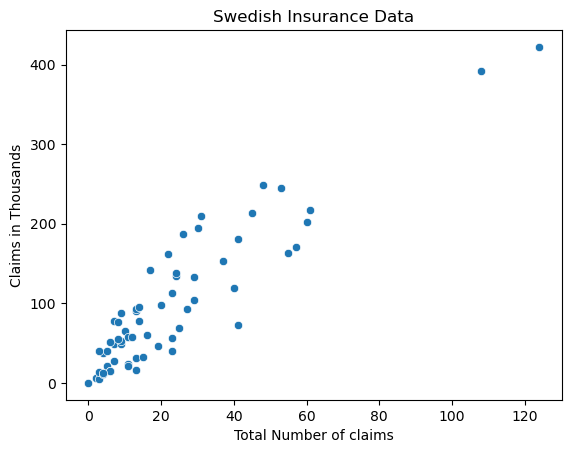

In [4]:
sns.scatterplot(data=df, x='X', y='Y')
plt.title('Swedish Insurance Data')
plt.xlabel('Total Number of claims')
plt.ylabel('Claims in Thousands')
plt.show()

<AxesSubplot: xlabel='X', ylabel='Y'>

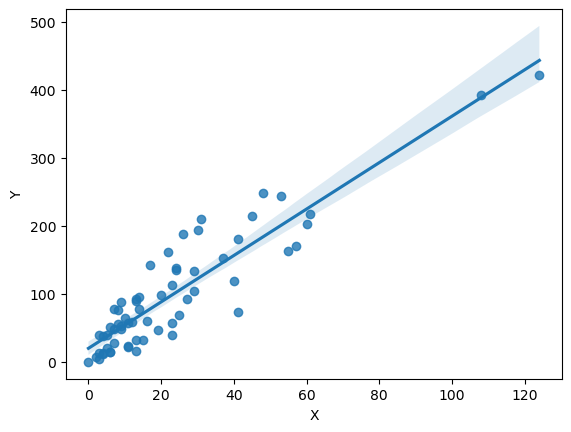

In [5]:
sns.regplot(data=df, x='X', y='Y')

In [6]:
mean_x = np.mean(df['X'])
mean_y = np.mean(df['Y'])

var_x = np.var(df['X'])
var_y = np.var(df['Y'])

print('x -> stats: mean = %.3f | variance = %.3f' % (mean_x, var_x))
print('y -> stats: mean = %.3f | variance = %.3f' % (mean_y, var_y))

x -> stats: mean = 22.905 | variance = 536.658
y -> stats: mean = 98.187 | variance = 7505.052


In [7]:
def covariance(x, y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    covar = 0.0
    
    for i in range(len(x)):
        covar += (x[i] -mean_x) * (y[i] - mean_y)
    return covar/len(x)

covar_xy = covariance(df['X'], df['Y'])
print(f'Cov(X, Y): {covar_xy}')

Cov(X, Y): 1832.0543461829182


In [8]:
w = covar_xy / var_x
b = mean_y - w * mean_x

print(f'Coefficents: \n w: {w} \n b: {b}')

Coefficents: 
 w: 3.413823560066368 
 b: 19.99448575911478


In [9]:
x = df['X'].values.copy()
print(x)

[108  19  13 124  40  57  23  14  45  10   5  48  11  23   7   2  24   6
   3  23   6   9   9   3  29   7   4  20   7   4   0  25   6   5  22  11
  61  12   4  16  13  60  41  37  55  41  11  27   8   3  17  13  13  15
   8  29  30  24   9  31  14  53  26]


In [10]:
x = df['X'].values.copy()
print(f'x: {x}')

# predicting
y_hat = b + w * x
print(f'\n\n\ny_hat: {y_hat}')

y = df['Y'].values
print(f'\n\n\ny: {y}')

x: [108  19  13 124  40  57  23  14  45  10   5  48  11  23   7   2  24   6
   3  23   6   9   9   3  29   7   4  20   7   4   0  25   6   5  22  11
  61  12   4  16  13  60  41  37  55  41  11  27   8   3  17  13  13  15
   8  29  30  24   9  31  14  53  26]



y_hat: [388.68743025  84.8571334   64.37419204 443.30860721 156.54742816
 214.58242868  98.51242764  67.7880156  173.61654596  54.13272136
  37.06360356 183.85801664  57.54654492  98.51242764  43.89125068
  26.82213288 101.9262512   40.47742712  30.23595644  98.51242764
  40.47742712  50.7188978   50.7188978   30.23595644 118.995369
  43.89125068  33.64978     88.27095696  43.89125068  33.64978
  19.99448576 105.34007476  40.47742712  37.06360356  95.09860408
  57.54654492 228.23772292  60.96036848  33.64978     74.61566272
  64.37419204 224.82389936 159.96125172 146.30595748 207.75478156
 159.96125172  57.54654492 112.16772188  47.30507424  30.23595644
  78.02948628  64.37419204  64.37419204  71.20183916  47.30507424
 118.9953

In [11]:
df['prediction'] = y_hat

In [12]:
df

X      Y  prediction
0   108  392.5  388.687430
1    19   46.2   84.857133
2    13   15.7   64.374192
3   124  422.2  443.308607
4    40  119.4  156.547428
..  ...    ...         ...
58    9   87.4   50.718898
59   31  209.8  125.823016
60   14   95.5   67.788016
61   53  244.6  200.927134
62   26  187.5  108.753898

[63 rows x 3 columns]

In [13]:
def compute_sme(y, y_hat):
    actual = np.array(y)
    predicted = np.array(y_hat)
    difference = np.subtract(actual, predicted)
    squared_diff = np.square(difference)
    return squared_diff.mean()

error = compute_sme(df['Y'], df['prediction'])
print(error)

1250.7419293814687


<AxesSubplot: xlabel='X', ylabel='prediction'>

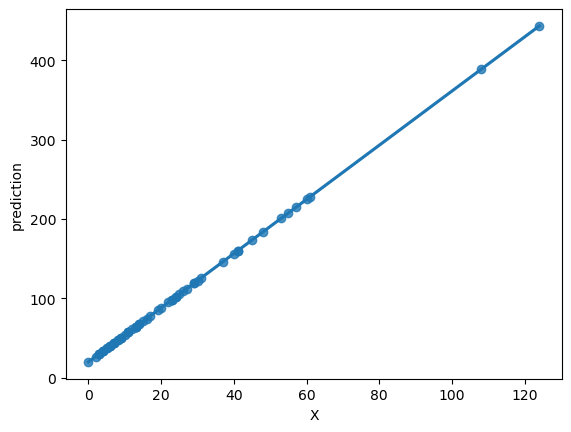

In [14]:
sns.regplot(data=df, x='X', y='prediction')

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_true=df['Y'], y_pred=y_hat)
mse = mean_squared_error(y_true=df['Y'], y_pred=y_hat)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squarred Error: {mse}')

Mean Absolute Error: 28.475678125093758
Mean Squarred Error: 1250.7419293814687
